In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem 
#from stats import mean, median, mode, multi_mode

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [4]:
mouse_data = pd.read_csv(mouse_drug_data)
clinical_data = pd.read_csv(clinical_trial_data)

clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
master = clinical_data.merge(mouse_data)
master

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


In [6]:
drug_timepoint_tv = master[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
drug_timepoint_tv

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552
...,...,...,...
1901,Capomulin,25,33.118756
1902,Capomulin,30,31.758275
1903,Capomulin,35,30.834357
1904,Capomulin,40,31.378045


In [7]:
drug_groups = drug_timepoint_tv.groupby(["Drug", "Timepoint"])

drug_groups_mean = drug_groups.mean()

drug_groups_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [8]:
drug_groups = drug_timepoint_tv.groupby(["Drug", "Timepoint"])

drug_groups_sem = drug_groups.sem()
drug_groups_sem

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [9]:
drug_groups_mean = drug_groups_mean.reset_index()
drug_groups_mean_pivot = drug_groups_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

drug_groups_sem = drug_groups_sem.reset_index()
drug_groups_sem_pivot = drug_groups_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

drug_groups_mean_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


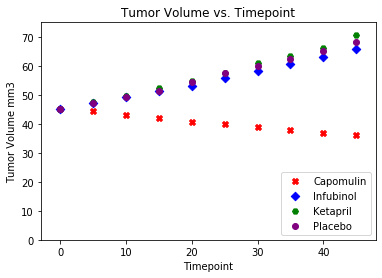

In [10]:
data = drug_groups_mean_pivot
df = pd.DataFrame(data, columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

axes = plt.gca()
axes.set_ylim([0,75])

time = np.arange(0,50,5)

cap = plt.scatter(time, df["Capomulin"], color = 'red', marker = 'X')
inf = plt.scatter(time, df["Infubinol"], color = 'blue', marker = 'D')
ket = plt.scatter(time, df["Ketapril"], color = 'green', marker = 'H')
pla = plt.scatter(time, df["Placebo"], color = 'purple')

plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm3")

plt.legend(labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc = 'lower right')


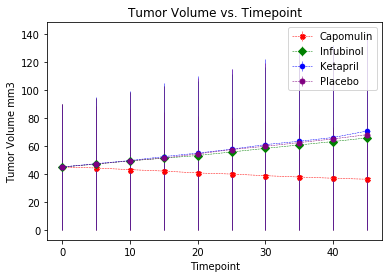

In [11]:
#error mean
plt.errorbar(drug_groups_mean_pivot.index, drug_groups_mean_pivot["Capomulin"], 
             yerr=drug_groups_mean_pivot["Capomulin"], 
             color="r", marker="X", markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(drug_groups_mean_pivot.index, drug_groups_mean_pivot["Infubinol"], 
             yerr=drug_groups_mean_pivot["Infubinol"], 
             color="g", marker="D", markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(drug_groups_mean_pivot.index, drug_groups_mean_pivot["Ketapril"], 
             yerr=drug_groups_mean_pivot["Ketapril"], 
             color="b", marker = 'H', markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(drug_groups_mean_pivot.index, drug_groups_mean_pivot["Placebo"], 
             yerr=drug_groups_mean_pivot["Placebo"], 
             color="purple", marker="o", markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.legend(labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc = 'upper right')

plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume mm3")

plt.savefig('tvolume.png')

In [12]:
drug_metastatic = master[["Drug", "Timepoint", "Metastatic Sites"]]
drug_metastatic

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0
...,...,...,...
1901,Capomulin,25,1
1902,Capomulin,30,1
1903,Capomulin,35,1
1904,Capomulin,40,1


In [13]:
meta_sites1 = drug_metastatic.groupby(["Drug", "Timepoint"])
meta_sites1.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0
...,...,...,...
1721,Capomulin,35,0
1722,Capomulin,40,0
1723,Capomulin,45,0
1732,Capomulin,40,0


In [14]:
meta_sites1_mean = meta_sites1.mean()
meta_sites1_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [15]:
meta_sites1_sem = meta_sites1.sem()
meta_sites1_sem

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [16]:
meta_sites1_mean = meta_sites1_mean.reset_index()
meta_sites1_mean_pivot = meta_sites1_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

meta_sites1_sem = meta_sites1_sem.reset_index()
meta_sites1_sem_pivot = meta_sites1_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

meta_sites1_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Text(0, 0.5, 'Metastatic Sites')

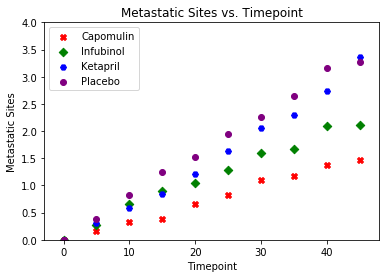

In [23]:
data_meta = meta_sites1_mean_pivot
df_meta = pd.DataFrame(data_meta, columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

axes = plt.gca()
axes.set_ylim([0,4])

time = np.arange(0,50,5)

cap2 = plt.scatter(time, df_meta["Capomulin"], color = 'red', marker = 'X')
inf2 = plt.scatter(time, df_meta["Infubinol"], color = 'green', marker = 'D')
ket2 = plt.scatter(time, df_meta["Ketapril"], color = 'blue', marker = 'H')
pla2 = plt.scatter(time, df_meta["Placebo"], color = 'purple')

plt.legend(labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc = 'upper left')

plt.title("Metastatic Sites vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

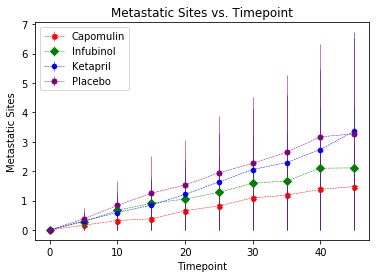

In [18]:
#error bar 3
plt.errorbar(meta_sites1_mean_pivot.index, meta_sites1_mean_pivot["Capomulin"], 
             yerr=meta_sites1_mean_pivot["Capomulin"], 
             color="r", marker="X", markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_sites1_mean_pivot.index, meta_sites1_mean_pivot["Infubinol"], 
             yerr=meta_sites1_mean_pivot["Infubinol"], 
             color="g", marker="D", markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_sites1_mean_pivot.index, meta_sites1_mean_pivot["Ketapril"], 
             yerr=meta_sites1_mean_pivot["Ketapril"], 
             color="b", marker = 'H', markersize=5, 
             linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_sites1_mean_pivot.index, meta_sites1_mean_pivot["Placebo"], 
             yerr=meta_sites1_mean_pivot["Placebo"], 
             color="purple", marker="o", markersize=5, 
             linestyle="dashed", linewidth=0.50)
plt.legend(labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc = 'upper left')

plt.title("Metastatic Sites vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

plt.savefig('meta_sites.png')

In [19]:
#survival rate
survival_count = master.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_count = pd.DataFrame({"Mouse Count": survival_count})


survival_count= survival_count.reset_index()
survival_count_new = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
survival_count_new

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


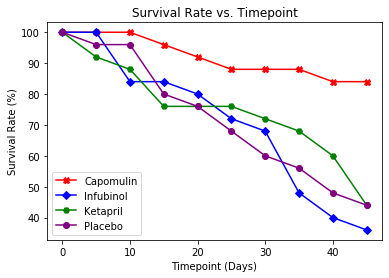

In [20]:
time = np.arange(0,50,5)

plt.plot(time, 100 * survival_count_new["Capomulin"]/25, marker="X", color = 'red')
plt.plot(time, 100 * survival_count_new["Infubinol"]/25, marker = "D", color = 'blue' )
plt.plot(time, 100 * survival_count_new["Ketapril"]/25, marker = "H", color = 'green'  )
plt.plot(time, 100 * survival_count_new["Placebo"]/25, marker = "o", color = 'purple' )

plt.legend(labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"],loc = 'lower left')

plt.title("Survival Rate vs. Timepoint")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate (%)")

plt.savefig('survival.png')


In [21]:
#tumor change over 45 day treatment 
tumor_change = 100*(drug_groups_mean_pivot.iloc[-1] - drug_groups_mean_pivot.iloc[0])/drug_groups_mean_pivot.iloc[0]
tumor_change
df_tumor = pd.DataFrame(tumor_change)


df_tumor

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


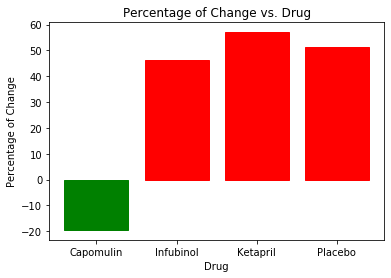

<Figure size 432x288 with 0 Axes>

In [22]:
bar = plt.bar(["Capomulin", "Infubinol", "Ketapril", "Placebo"], [-19.475303, 46.123472, 57.028795, 51.297960])

bar[0].set_color('g')
bar[1].set_color('r')
bar[2].set_color('r')
bar[3].set_color('r')


plt.title("Percentage of Change vs. Drug")
plt.xlabel("Drug")s
plt.ylabel("Percentage of Change")

plt.show()
plt.savefig('change.png')

In [ ]:
#Observable trends: 
#It looks like Capomulin has a positive effect on the treatment of cancer in Mice. 
    #1. There is an observable drop in the tumor volume of Mice who are put on Capomulin. This is observed in the first graph. 
    #2. While there is still an upward trend, the number of metstatic sites for mice who are put on Capomulin is less than those of the other three drugs. 
    #3. The Survival rate of mice on Capomulin is higher than those of the other three drugs. It stops at 80% after 45 days while the other drugs go down to 40% pretty steadily.
    #4. While Infubinol seems like it is the next best option for a drug, and seems like it works in the tumor volume and metastatic site graphs, it doesn't look great in the last two graphs. 